In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
data1 = pd.read_csv('./jaimin/jaimin_info.csv')
data2 = pd.read_csv('./mukul/mukul_info.csv')

In [3]:
data1 = data1.drop_duplicates(subset='trackName', keep="last")
data1 = data1.reset_index()
data2 = data2.drop_duplicates(subset='trackName', keep="last")
data2 = data2.reset_index()

data1 = data1.drop(columns=['Unnamed: 0', 'index', 'time_signature', 'popularity', 'explicit'])
data2 = data2.drop(columns=['Unnamed: 0', 'index', 'time_signature'])

# Spotify Audio Features

- Acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- Danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- Energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- Loudness: he overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [4]:
data1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,trackName,artistName
0,0.679,0.582,11,-10.459,1,0.0615,0.0306,0.000932,0.1080,0.767,149.975,110PnrQX9AJIt3HNJtjPgt,277200,False Direction,Dayglow
1,0.467,0.859,0,-2.946,0,0.0409,0.6610,0.000000,0.0522,0.673,89.842,0mh4VutnDyBn1sqcp05MZD,251480,Mat Aazma Re,Pritam
2,0.678,0.771,6,-2.849,1,0.0266,0.0277,0.002530,0.1490,0.462,105.976,3s6H6UW7yPu2rsF8CGki60,253200,Zindagi Do Pal Ki,KK
3,0.636,0.745,2,-5.400,0,0.0378,0.1550,0.000003,0.1320,0.719,139.986,5LwlAJEkUeJEDBbN14RV6o,288356,Saanson Ke,KK
4,0.486,0.382,6,-6.183,1,0.0286,0.6130,0.000086,0.1490,0.164,125.918,5nHwX7e5XHnie22nuTFgda,333200,Dil Kyun Yeh Mera,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,0.556,0.202,4,-16.397,1,0.0324,0.9150,0.038100,0.1120,0.200,145.017,0cJTjTH3XVTTJh8F4Uq1db,243310,Waqt Ki Baatein,Dream Note
633,0.744,0.700,2,-7.663,1,0.0375,0.2780,0.000155,0.0680,0.867,144.033,4FeczSomVWVyU4FW7xDeAI,309640,tere bina,Zaeden
634,0.699,0.299,6,-12.599,1,0.0403,0.8690,0.000000,0.0724,0.459,118.969,74kCarkFBzXYXNkkYJIsG0,212773,Alag Aasmaan,Anuv Jain
635,0.653,0.446,0,-7.867,1,0.0351,0.5460,0.000045,0.1090,0.472,100.018,6E6BCsQHXDAdXsrL7zV71N,218550,Roz Roz,The Yellow Diary


In [5]:
data2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,trackName,artistName
0,0.348,0.166,11,-20.349,1,0.0376,0.8520,0.915000,0.1370,0.0337,123.580,audio_features,3VqiD8Yvk6bKwqS1e64PHB,spotify:track:3VqiD8Yvk6bKwqS1e64PHB,https://api.spotify.com/v1/tracks/3VqiD8Yvk6bK...,https://api.spotify.com/v1/audio-analysis/3Vqi...,60107,Colour Spectrum,Coldplay
1,0.726,0.731,1,-6.298,0,0.1590,0.1100,0.000003,0.0928,0.4370,170.125,audio_features,5d1rmWWF1725tnYjq6rMDB,spotify:track:5d1rmWWF1725tnYjq6rMDB,https://api.spotify.com/v1/tracks/5d1rmWWF1725...,https://api.spotify.com/v1/audio-analysis/5d1r...,190293,Way To Break My Heart (feat. Skrillex),Ed Sheeran
2,0.599,0.747,2,-5.922,1,0.0375,0.0191,0.000005,0.0993,0.4540,126.031,audio_features,7iq8PFNFGvsBgAD4Mcx737,spotify:track:7iq8PFNFGvsBgAD4Mcx737,https://api.spotify.com/v1/tracks/7iq8PFNFGvsB...,https://api.spotify.com/v1/audio-analysis/7iq8...,157143,iPad - Frank Walker Remix,The Chainsmokers
3,0.619,0.277,11,-11.771,1,0.0322,0.8920,0.054200,0.1160,0.4350,111.576,audio_features,5h1L6nOR9QYXeeNW14aeus,spotify:track:5h1L6nOR9QYXeeNW14aeus,https://api.spotify.com/v1/tracks/5h1L6nOR9QYX...,https://api.spotify.com/v1/audio-analysis/5h1L...,171149,Pause,Prateek Kuhad
4,0.611,0.525,7,-9.683,1,0.0354,0.7670,0.799000,0.1120,0.2990,113.946,audio_features,0SHa9XHwYYB1UUmgbgHuhQ,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...,https://api.spotify.com/v1/audio-analysis/0SHa...,193733,Favorite Peeps,Prateek Kuhad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.315,0.904,7,-3.773,1,0.0638,0.5360,0.002520,0.9570,0.2180,118.032,audio_features,6ZHCQehGCpGWTi6wEzs8vf,spotify:track:6ZHCQehGCpGWTi6wEzs8vf,https://api.spotify.com/v1/tracks/6ZHCQehGCpGW...,https://api.spotify.com/v1/audio-analysis/6ZHC...,357105,While My Guitar Gently Weeps - Live,Paul McCartney
1159,0.584,0.576,9,-4.557,1,0.0519,0.5070,0.000000,0.2120,0.4320,170.026,audio_features,28a0aMV1OKoyNiCJuNsWrY,spotify:track:28a0aMV1OKoyNiCJuNsWrY,https://api.spotify.com/v1/tracks/28a0aMV1OKoy...,https://api.spotify.com/v1/audio-analysis/28a0...,165620,That’s Not How This Works (feat. Dan + Shay),Charlie Puth
1160,0.469,0.361,0,-8.275,1,0.0293,0.7850,0.001540,0.1040,0.0775,111.972,audio_features,2uy15favOgEOtS8wjAD9B1,spotify:track:2uy15favOgEOtS8wjAD9B1,https://api.spotify.com/v1/tracks/2uy15favOgEO...,https://api.spotify.com/v1/audio-analysis/2uy1...,251277,Tum Ho Toh,Farhan Akhtar
1161,0.658,0.721,11,-4.892,1,0.0304,0.5760,0.000000,0.1150,0.5620,104.076,audio_features,5fqAR2xqe0zZ6eY4PRsnRk,spotify:track:5fqAR2xqe0zZ6eY4PRsnRk,https://api.spotify.com/v1/tracks/5fqAR2xqe0zZ...,https://api.spotify.com/v1/audio-analysis/5fqA...,178269,Love To Go - Acoustic Version,Lost Frequencies


We combined both the dataframes by using a extra `who` in the combined dataFrame.
- Jaimin : 1
- Mukul : 0

In [6]:
data1['who'] = 1
data2['who'] = 0

In [8]:
df_couple = data1.append(data2)
df_couple.reset_index(inplace= True)
df_couple.drop('index', axis = 1, inplace= True)
df_couple.head(3)

/var/folders/yp/n74hncp91yx5nd3f2q977y_c0000gn/T/ipykernel_7758/2376918984.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_couple = data1.append(data2)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,trackName,artistName,who,type,uri,track_href,analysis_url
0,0.679,0.582,11,-10.459,1,0.0615,0.0306,0.000932,0.1080,0.767,149.975,110PnrQX9AJIt3HNJtjPgt,277200,False Direction,Dayglow,1,NaN,NaN,NaN,NaN
1,0.467,0.859,0,-2.946,0,0.0409,0.6610,0.000000,0.0522,0.673,89.842,0mh4VutnDyBn1sqcp05MZD,251480,Mat Aazma Re,Pritam,1,NaN,NaN,NaN,NaN
2,0.678,0.771,6,-2.849,1,0.0266,0.0277,0.002530,0.1490,0.462,105.976,3s6H6UW7yPu2rsF8CGki60,253200,Zindagi Do Pal Ki,KK,1,NaN,NaN,NaN,NaN


We extract 7 features form the dataset :
1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. speechiness
7. valence

In [9]:
def features(df,who):
    if who == 'both':
         features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'who']]         
    elif who == 0 or who == 1:   
          features = df.loc[df.who == who,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]           
    else:
        return 'Error'
    return features

In [10]:
features_jaimin = features(df_couple, 1)
features_mukul = features(df_couple,0)
features_jaimin.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0306,0.679,0.582,0.000932,0.1080,0.0615,0.767
1,0.6610,0.467,0.859,0.000000,0.0522,0.0409,0.673
2,0.0277,0.678,0.771,0.002530,0.1490,0.0266,0.462
3,0.1550,0.636,0.745,0.000003,0.1320,0.0378,0.719
4,0.6130,0.486,0.382,0.000086,0.1490,0.0286,0.164


In [44]:
import plotly.graph_objects as go

N = len(features_jaimin.mean())
ind = list(features_jaimin)
jaimin_means = list(features_jaimin.mean())
mukul_means = list(features_mukul.mean())

fig = go.Figure()
fig.update_layout(title="Mean values of the audio features", yaxis_title="Mean",
                  width=800, height=600, barmode='group')

fig.add_trace(go.Bar(x=ind, y=jaimin_means, name='Jaimin', marker_color='lightslategray'))

fig.add_trace(go.Bar(x=ind, y=mukul_means, name='Mukul', marker_color='mediumvioletred'))

fig.update_layout(xaxis_tickfont_size=12)

fig.update_layout(legend=dict(x=0, y=1.2, orientation='h'))

fig.show()

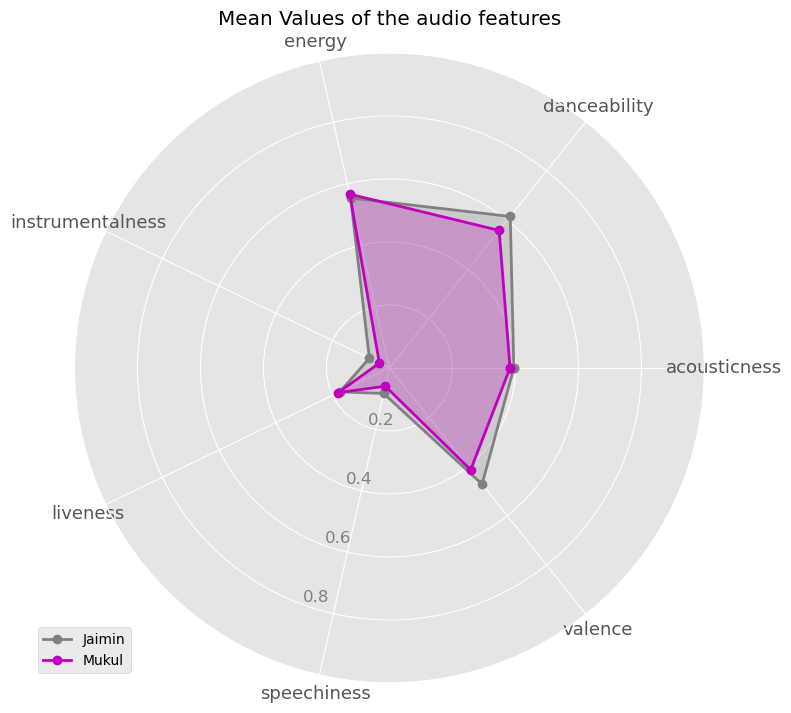

In [48]:
labels= list(features_jaimin)[:]
stats= features_jaimin.mean().tolist()
stats2 = features_mukul.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Jaimin", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids((angles * 180/np.pi)[:-1], labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Mukul", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [49]:
import plotly.graph_objects as go

colors = ['lightslategray','lightslategray','lightslategray',
'mediumvioletred','mediumvioletred','mediumvioletred','mediumvioletred']
dif_features = features_jaimin.mean() - features_mukul.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig = go.Figure(go.Bar(x=dif_features.sort_values(ascending = False), y=index, orientation='h', marker_color=colors))

#Create Legend
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Jaimin')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Mukul')
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="right", x=1))

#labels
fig.update_layout(xaxis_title='Mean', yaxis_title='Features', font=dict(size=14))
fig.show()

## How diversified are the lists ?!
The variety of the lists can be investigated by checking the difference in genres of our songs. In case most of the songs belong to the same genre we would say that they are low varied.

The question is: How would we analyze this ? well, the answer is simple : Let's check the standard deviation of each audio variable and examine them.

Although the standard deviation of the audio features themselves do not give us much information ( as we can see in the plots below), we can sum them up and calculate the mean of the standard deviation of the lists. By doing that we get the values represented in the plot "Variety of Audio Features" with values of 0.19 in Jaimin's list and 0.18 in Mukul's list.

How would we interpret that?! Well, let's say we can have songs with a high value of a specific feature such as energy and other songs with a really low value for the same attribute. In short, those numbers suggest that Jaimin's songs are a bit more diversified than Mukul's.

In [59]:
round(features_jaimin.std().mean(),2), round(features_mukul.std().mean(),2)

(0.19, 0.18)

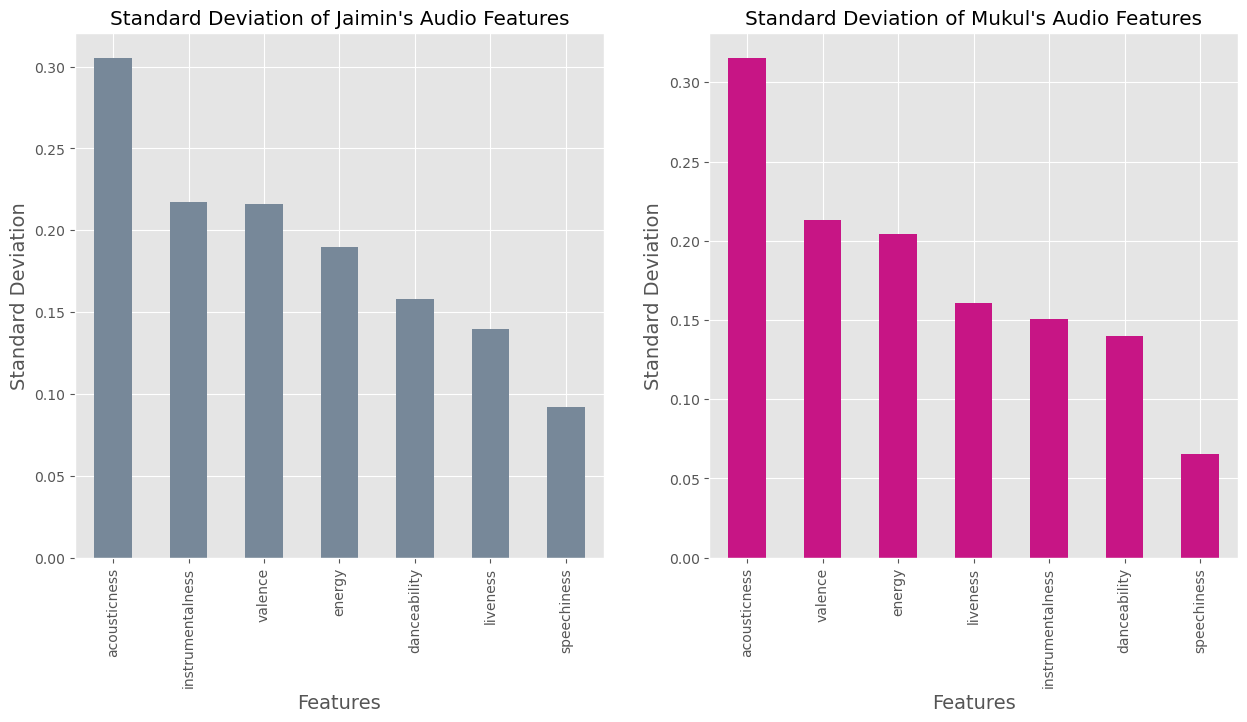

In [53]:
plt.subplot(221)

features_jaimin.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Jaimin's Audio Features")

plt.subplot(222)
features_mukul.std().sort_values(ascending= False).plot(kind = 'bar', color = 'mediumvioletred')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Mukul's Audio Features")
plt.rcParams['figure.figsize'] =(15,15)

/var/folders/yp/n74hncp91yx5nd3f2q977y_c0000gn/T/ipykernel_7758/3629165723.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/yp/n74hncp91yx5nd3f2q977y_c0000gn/T/ipykernel_7758/3629165723.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/yp/n74hncp91yx5nd3f2q977y_c0000gn/T/ipykernel_7758/3629

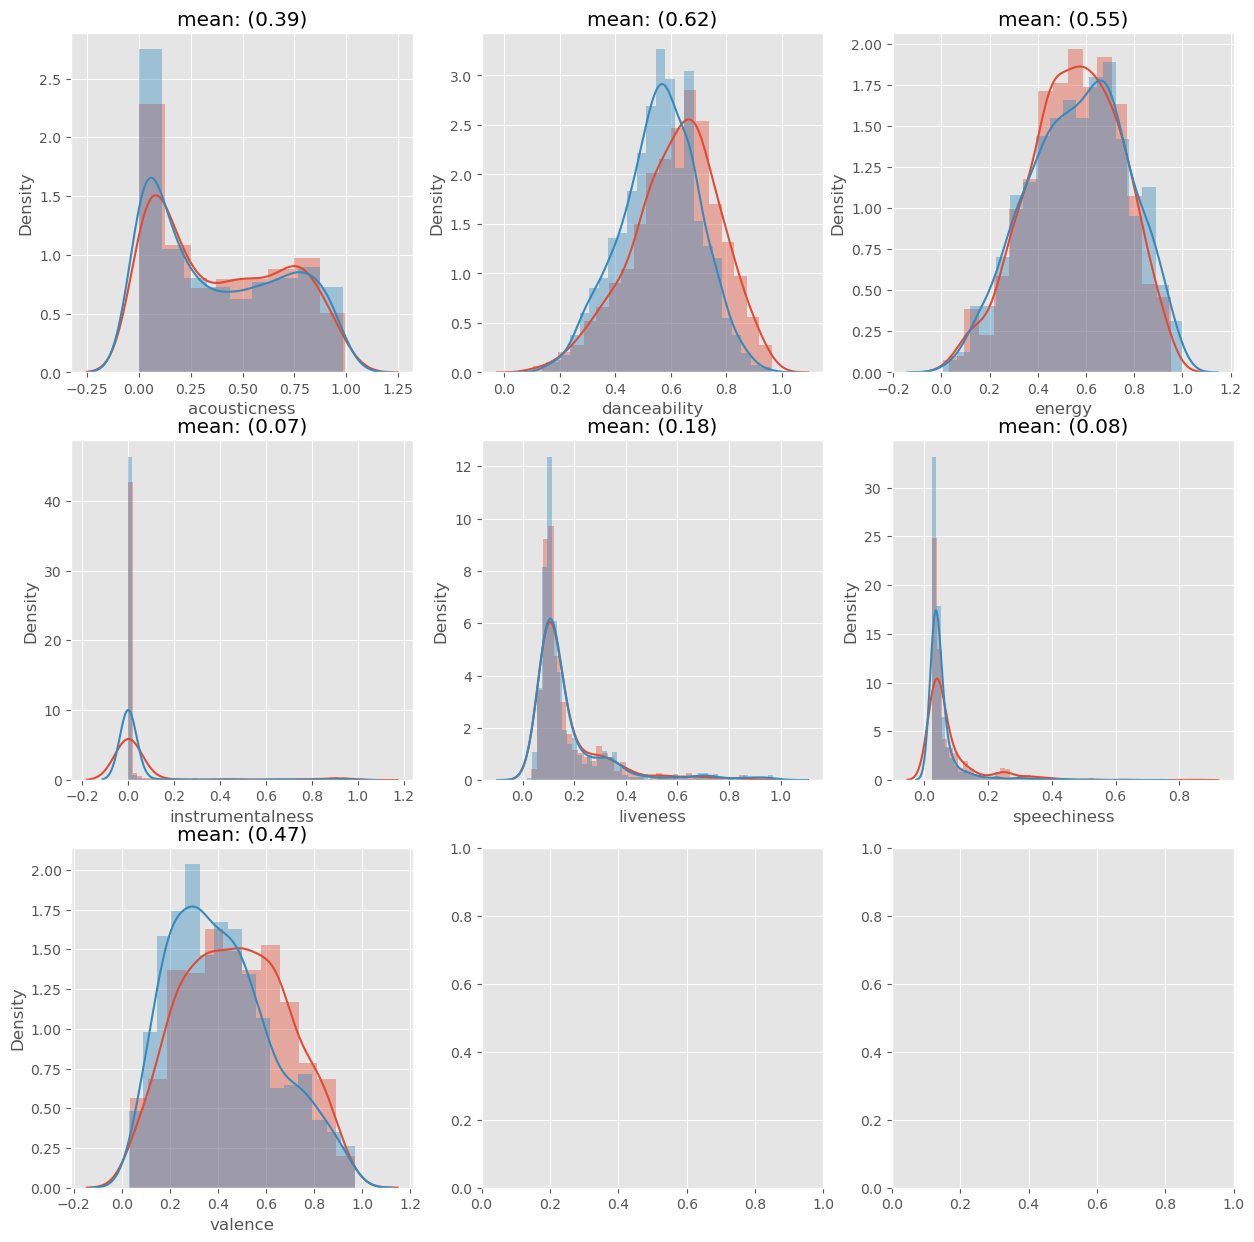

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))

for i, column in enumerate(features_jaimin.columns):
    sns.distplot(features_jaimin[column], ax=axes[i//3,i%3]).set_title("mean: (%s)" %features_jaimin[column].mean().round(decimals=2))
    sns.distplot(features_mukul[column], ax=axes[i//3,i%3])

# Conclusion
Jaimin and Mukul are 2 close friends, who spend their most time together in hostels in classes also. From the above analysis, we showed that even though the songs they listen to are very very different, the audio features tell that their songs have much similarity.